# 02 Creating a histogram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
import findspark; findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql import functions as F
spark = SparkSession.builder.appName('statistics').master('local').getOrCreate()

![Creating a histogram fig 1](./imgs/02-02-01.png)

In [3]:
ages = np.array([1,3,27,32,5,63,26,25,18,16,4,45,29,19,22,51,58,9,42,6])

# One Way

In [97]:
buckets = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
ages_list = []
for i in buckets:
    min_, max_ = i.split('-')
    get_ages = ages [ (ages>=int(min_)) & (ages<=int(max_)) ]
    ages_list.append(len(get_ages))
dataset = {'Buckets': buckets, '#': ages_list}

In [98]:
df = pd.DataFrame(dataset)
df

,Buckets,#
0,0-9,6
1,10-19,3
2,20-29,5
3,30-39,1
4,40-49,2
5,50-59,2
6,60-69,1


In [99]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.show()

+-------+---+
|Buckets|  #|
+-------+---+
|    0-9|  6|
|  10-19|  3|
|  20-29|  5|
|  30-39|  1|
|  40-49|  2|
|  50-59|  2|
|  60-69|  1|
+-------+---+



# Another

In [110]:
bins = np.arange(0,80,10)
ages_list, buckets = np.histogram(ages, bins)
dataset = {'Buckets': buckets[1:].tolist(), '#': ages_list.tolist()}

In [111]:
df = pd.DataFrame(dataset)
df

,Buckets,#
0,10,6
1,20,3
2,30,5
3,40,1
4,50,2
5,60,2
6,70,1


In [112]:
sdf = spark.createDataFrame(zip(*dataset.values()), list(dataset.keys()))
sdf.show()

+-------+---+
|Buckets|  #|
+-------+---+
|     10|  6|
|     20|  3|
|     30|  5|
|     40|  1|
|     50|  2|
|     60|  2|
|     70|  1|
+-------+---+



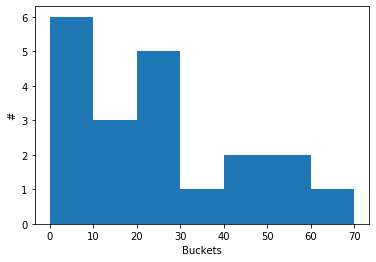

In [31]:
n, bins, _ = plt.hist(ages, buckets)
plt.xlabel('Buckets')
plt.ylabel('#')
plt.show()

In [89]:
print(n, bins)

[6. 3. 5. 1. 2. 2. 1.] [ 0 10 20 30 40 50 60 70]


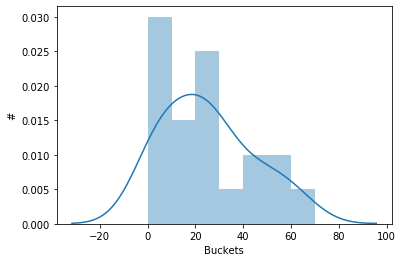

In [92]:
sns.distplot(ages, buckets)
plt.xlabel('Buckets')
plt.ylabel('#')
plt.show()

In [93]:
data = [go.Histogram(x=ages, nbinsx=7,
                     marker_color=['lightyellow', 'darkorange', 'cornflowerblue', 'magenta', 'lightgreen', 'darkviolet', 'yellow'])]
fig = go.Figure(data=data)
fig.update_layout(
    xaxis_title='bucket',
    yaxis_title='#'
)
fig.show()